In [207]:
%matplotlib inline
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import itertools as itr

In [208]:
iris = load_iris()
X = iris.data
Y = iris.target
feature_names = iris.feature_names
K = 3

In [209]:
print(X.shape, Y.shape)

(150, 4) (150,)


In [210]:
# X has 4 dimensions
X[:10,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [211]:
# initialize values
values = (nd.arange(1,4) / 4).reshape(3,1) * nd.ones((3,4)) * (X.max(axis=0) - X.min(axis=0)) + X.min(axis=0)
print(values)

[[5.2   2.6   2.475 0.7  ]
 [6.1   3.2   3.95  1.3  ]
 [7.    3.8   5.425 1.9  ]]


In [212]:
N = X.shape[0]
# cluster is a predicted cluster for a data point
# initialize randomly
cluster = np.random.randint(3, size=N)
print(cluster)

[2 0 0 1 0 0 0 2 1 1 2 1 1 1 2 0 0 1 2 2 2 2 0 0 2 2 2 0 1 0 2 2 2 2 1 2 1
 2 1 0 1 1 2 1 2 1 2 0 1 1 1 0 0 0 2 1 1 1 1 0 1 1 0 0 1 2 0 2 1 2 0 2 1 0
 0 2 0 1 0 2 1 0 1 1 2 0 0 1 1 2 2 2 2 2 2 1 1 0 1 2 0 0 0 0 0 1 0 1 2 0 1
 0 2 0 2 2 2 1 2 1 1 0 0 1 2 1 2 0 2 2 0 1 0 0 2 2 1 2 2 0 1 0 1 0 0 0 0 0
 1 1]


In [213]:
print(feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


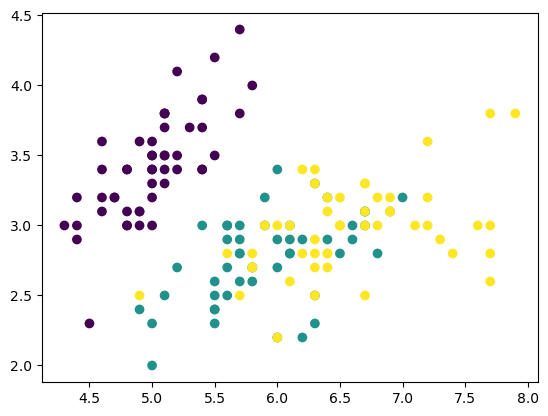

In [214]:
plt.scatter(X[:,0], X[:,1], c=Y)

In [215]:
X[cluster == 0].mean(0)

array([5.97647059, 3.05490196, 4.10980392, 1.39607843])

In [216]:
# in this process, we update values by taking the mean with respect to the estimated cluster
# INPUT:
# X: N by d data
# values: the centers of each cluster
# cluster: tensor of dimensionality N, which represent the cluster the i-th entry belongs

# OUTPUT:
# updated values, which is K by d, computed from the current clustering

def M_process(X, values, cluster):
    ret_values = np.zeros((K, 4))
    for i in range(K):
        ret_values[i] = X[cluster == i].mean(0)
    return ret_values

In [217]:
# in this process, we update the assignment of clusters with respect to the current values.
# Each data point is associated with the cluster with nearest centre
def E_process(X, values, cluster):
    reshaped_values = values.reshape(values.shape[0], 1, values.shape[1])
    # returns a new cluster assignment for each data point
    return np.argmin(((X - reshaped_values)**2).sum(axis=2), axis=0)

In [218]:
num_epochs = 10
for epoch in range(1, num_epochs + 1):
    values = M_process(X, values, cluster)
    cluster = E_process(X, values, cluster)

In [219]:
# virtual processing is already finished,
# we give most suitable name for each cluster
# by testing all the permutations
max_correct = 0
max_perm = np.zeros(1)
for perm in itr.permutations(np.arange(3)):
    ar_perm = np.array(perm)
    num_correct = (ar_perm[cluster] == Y).sum()
    if num_correct > max_correct:
        max_correct = num_correct
        max_perm = ar_perm

cluster = max_perm[cluster]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 2 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


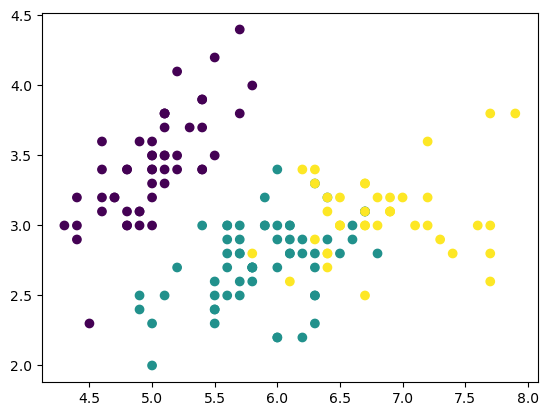

In [220]:
print(cluster)
plt.scatter(X[:,0], X[:,1], c=cluster)